In [1]:
import pandas as pd
import sqlite3

In [3]:
con = sqlite3.connect('mysqlitedb.db')
cursor = con.cursor()

In [4]:
cursor.execute('SELECT count(*) FROM nyc_data')
cursor.fetchone()

(425768,)

In [9]:
cursor.execute("""
            SELECT sql FROM sqlite_master 
            WHERE tbl_name = 'table_name' AND type = 'table'
            """)
cursor.fetchall()

[]

In [10]:
cursor.execute("PRAGMA table_info(table_name)")
cursor.fetchone()

In [2]:
from sqlalchemy import create_engine

con = create_engine('sqlite:///mysqlitedb.db')
df = pd.read_sql_query("""SELECT * FROM nyc_data""", con)
df.shape

(425768, 19)

In [23]:
df.columns

Index(['index', 'CAMIS', 'DBA', 'BORO', 'BUILDING', 'STREET', 'ZIPCODE',
       'PHONE', 'CUISINE DESCRIPTION', 'INSPECTION DATE', 'ACTION',
       'VIOLATION CODE', 'VIOLATION DESCRIPTION', 'CRITICAL FLAG', 'SCORE',
       'GRADE', 'GRADE DATE', 'RECORD DATE', 'INSPECTION TYPE'],
      dtype='object')

In [7]:
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
import plotly

In [31]:
import datetime as dt
from IPython.display import display

import plotly.plotly as py # interactive graphing
from plotly.graph_objs import Bar, Scatter, Marker, Layout 

In [17]:
df.head()

,index,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
0,0,41244379,LA UNION RESTAURANT,QUEENS,9118,CORONA AVENUE,11373.0,7185922786,Peruvian,03/13/2014,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,12.0,A,03/13/2014,03/16/2017,Cycle Inspection / Re-inspection
1,1,41609062,PARADISE CAFE NY RESTAURANT,BRONX,1021,OGDEN AVENUE,10452.0,7185376675,Spanish,01/06/2015,Violations were cited in the following area(s).,16B,The original nutritional fact labels and/or in...,Not Critical,NaN,None,None,03/16/2017,Trans Fat / Initial Inspection
2,2,50036606,MAGIC GYRO,BROOKLYN,2943,STILLWELL AVE,11224.0,7183738400,Turkish,09/28/2015,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,2.0,None,None,03/16/2017,Pre-permit (Non-operational) / Initial Inspection
3,3,41641198,Urban Vegan Kitchen,MANHATTAN,4143,CARMINE STREET,10014.0,6464389939,Vegetarian,05/03/2014,Establishment Closed by DOHMH. Violations wer...,08A,Facility not vermin proof. Harborage or condit...,Not Critical,74.0,None,None,03/16/2017,Cycle Inspection / Re-inspection
4,4,50034545,YUPDDUK,QUEENS,15722,NORTHERN BLVD,11354.0,7183530081,Korean,01/07/2016,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,13.0,None,None,03/16/2017,Cycle Inspection / Initial Inspection


In [55]:
len(df.DBA.unique())

20773

In [4]:
df.groupby('DBA')['CAMIS'].count().sort_values(ascending=False).head()

DBA
DUNKIN' DONUTS                    4481
SUBWAY                            4177
MCDONALD'S                        3072
STARBUCKS                         2286
DUNKIN' DONUTS, BASKIN ROBBINS    1547
Name: CAMIS, dtype: int64

In [28]:
import html5lib

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11f4c6748>]], dtype=object)

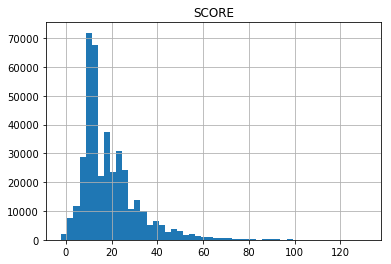

In [9]:
df.hist('SCORE', bins=50)

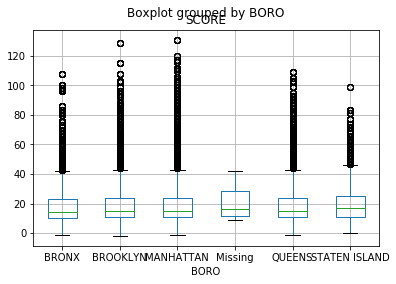

In [13]:
df.boxplot('SCORE', by='BORO')

In [2]:
eateries = pd.read_html('~/Downloads/DPR_eateries_001.xml', 'xml.parser')

ValueError: No tables found

In [19]:
df.groupby('BORO')['CAMIS'].count()

BORO
BRONX             37617
BROOKLYN         104670
MANHATTAN        170056
Missing              52
QUEENS            98775
STATEN ISLAND     14598
Name: CAMIS, dtype: int64

In [23]:
list(zip(range(len(df.columns)), df.columns))

[(0, 'index'),
 (1, 'CAMIS'),
 (2, 'DBA'),
 (3, 'BORO'),
 (4, 'BUILDING'),
 (5, 'STREET'),
 (6, 'ZIPCODE'),
 (7, 'PHONE'),
 (8, 'CUISINE DESCRIPTION'),
 (9, 'INSPECTION DATE'),
 (10, 'ACTION'),
 (11, 'VIOLATION CODE'),
 (12, 'VIOLATION DESCRIPTION'),
 (13, 'CRITICAL FLAG'),
 (14, 'SCORE'),
 (15, 'GRADE'),
 (16, 'GRADE DATE'),
 (17, 'RECORD DATE'),
 (18, 'INSPECTION TYPE')]

In [ ]:
plot_def = {
    'data': [Bar(x=df['ComplaintType'], y=df.num_complaints)],
    'layout': { 
        'margin': {'b': 150}, # Make the bottom margin a bit bigger to handle the long text
        'xaxis': {'tickangle': 40}} # Angle the labels a bit
}

In [3]:
import xml.etree.ElementTree as ET
from lxml import etree
import pandas as pd

def xml2df(xml_data):
    tree = ET.parse(xml_data)
    root = tree.getroot()
    all_records = []
    headers = []
    for i, child in enumerate(root):
        record = []
        for subchild in child:
            record.append(subchild.text)
            if subchild.tag not in headers:
                headers.append(subchild.tag)
        all_records.append(record)
    return pd.DataFrame(all_records, columns=headers)

In [8]:
eateries = xml2df('/Users/dpl/Downloads/DPR_Eateries_001.xml')

In [9]:
eateries.columns

Index(['{http://www.nycgovparks.org/bigapps/desc/DPR_Eateries_001.txt}name',
       '{http://www.nycgovparks.org/bigapps/desc/DPR_Eateries_001.txt}location',
       '{http://www.nycgovparks.org/bigapps/desc/DPR_Eateries_001.txt}park_id',
       '{http://www.nycgovparks.org/bigapps/desc/DPR_Eateries_001.txt}start_date',
       '{http://www.nycgovparks.org/bigapps/desc/DPR_Eateries_001.txt}end_date',
       '{http://www.nycgovparks.org/bigapps/desc/DPR_Eateries_001.txt}description',
       '{http://www.nycgovparks.org/bigapps/desc/DPR_Eateries_001.txt}permit_number',
       '{http://www.nycgovparks.org/bigapps/desc/DPR_Eateries_001.txt}phone',
       '{http://www.nycgovparks.org/bigapps/desc/DPR_Eateries_001.txt}website',
       '{http://www.nycgovparks.org/bigapps/desc/DPR_Eateries_001.txt}type_name'],
      dtype='object')

In [10]:
eateries.head()

,{http://www.nycgovparks.org/bigapps/desc/DPR_Eateries_001.txt}name,{http://www.nycgovparks.org/bigapps/desc/DPR_Eateries_001.txt}location,{http://www.nycgovparks.org/bigapps/desc/DPR_Eateries_001.txt}park_id,{http://www.nycgovparks.org/bigapps/desc/DPR_Eateries_001.txt}start_date,{http://www.nycgovparks.org/bigapps/desc/DPR_Eateries_001.txt}end_date,{http://www.nycgovparks.org/bigapps/desc/DPR_Eateries_001.txt}description,{http://www.nycgovparks.org/bigapps/desc/DPR_Eateries_001.txt}permit_number,{http://www.nycgovparks.org/bigapps/desc/DPR_Eateries_001.txt}phone,{http://www.nycgovparks.org/bigapps/desc/DPR_Eateries_001.txt}website,{http://www.nycgovparks.org/bigapps/desc/DPR_Eateries_001.txt}type_name
0,Central Park Food Cart,At the entrance to the path leading to the Pon...,M010,2014-01-01,2018-12-31,None,M10-61-ED-C,None,None,Food Cart
1,Central Park Food Cart,"At the intersection of paths, east side of Eas...",M010,2013-03-08,2016-12-31,None,M10-70-ED-C,None,None,Food Cart
2,Central Park Food Cart,"Central Park Mall Area, northwest side of the ...",M010,2010-02-23,2014-12-31,None,M10-72-1A-C,None,None,Food Cart
3,Central Park Food Cart,"West 72 Street path, west of Daniel Webster",M010,2010-03-25,2014-12-31,None,M10-72-3-C,None,None,Food Cart
4,Central Park Food Cart,East Drive and 72 Street,M010,2015-06-27,2019-12-31,None,M10-72-ED-C,None,None,Food Cart


In [14]:
eateries.columns = list(map(lambda x: x.replace('{http://www.nycgovparks.org/bigapps/desc/DPR_Eateries_001.txt}', ''), eateries.columns))

In [15]:
eateries.head()

,name,location,park_id,start_date,end_date,description,permit_number,phone,website,type_name
0,Central Park Food Cart,At the entrance to the path leading to the Pon...,M010,2014-01-01,2018-12-31,None,M10-61-ED-C,None,None,Food Cart
1,Central Park Food Cart,"At the intersection of paths, east side of Eas...",M010,2013-03-08,2016-12-31,None,M10-70-ED-C,None,None,Food Cart
2,Central Park Food Cart,"Central Park Mall Area, northwest side of the ...",M010,2010-02-23,2014-12-31,None,M10-72-1A-C,None,None,Food Cart
3,Central Park Food Cart,"West 72 Street path, west of Daniel Webster",M010,2010-03-25,2014-12-31,None,M10-72-3-C,None,None,Food Cart
4,Central Park Food Cart,East Drive and 72 Street,M010,2015-06-27,2019-12-31,None,M10-72-ED-C,None,None,Food Cart


In [16]:
eateries.location.unique()

array([ 'At the entrance to the path leading to the Pond, East Drive & E 61st Street',
       'At the intersection of paths, east side of East Drive, at approximately East 70 Street',
       'Central Park Mall Area, northwest side of the Bandshell',
       'West 72 Street path, west of Daniel Webster',
       'East Drive and 72 Street',
       'West Drive, between West 74 and West 75 streets',
       'East of West Drive, West 81 Street path to Delacorte Theater',
       'East 84 Street, pedestrian path, west side of East Drive',
       'Northwest corner of Heckscher ballfields',
       'East side of West Drive at West 96 Street',
       'The northeast corner of Central Park West and West 85th Street',
       'Central Park West & West 93rd Street',
       'Central Park West & West 96 Street', '8 Various Locations',
       'Near the entrance to West 91 Street Playground',
       'Northern end of West 96th Street Tennis',
       'On Riverside Drive and West 151st Street',
       '37th Ave

In [17]:
eateries.type_name.unique()

array(['Food Cart', 'Mobile Food Truck', 'Restaurant', 'Snack Bar',
       'Specialty Cart', 'Fruit & Vegetable Cart'], dtype=object)

In [18]:
eateries[eateries.type_name == 'Restaurant'].location.unique()

array(['East 72nd Street & Park Drive North',
       'Central Park West & West 67th Street', '1 Margaret Corbin Drive',
       'Rotunda at the West 79 Street Marina',
       '201-10 Cross Island Parkway', '52-11 111th Street',
       '1 Worlds Fair Marina', '200 Huguenot Avenue',
       '300 Father Capodanno Boulevard', '1150 Clove Road',
       'Dyckman Marina Restaurant', '1 Battery Park Plaza',
       'Union Square Park', 'Arthur Kill Road & Richmond Avenue'], dtype=object)

In [19]:
boro_names = {'X': 'Bronx',
'B': 'Brooklyn',
'M': 'Manhattan',
'Q': 'Queens',
'R': 'Staten Island'}

In [20]:
eateries['boro'] = eateries.park_id.apply(lambda x: boro_names[x[0]])
eateries.head()

,name,location,park_id,start_date,end_date,description,permit_number,phone,website,type_name,boro
0,Central Park Food Cart,At the entrance to the path leading to the Pon...,M010,2014-01-01,2018-12-31,None,M10-61-ED-C,None,None,Food Cart,Manhattan
1,Central Park Food Cart,"At the intersection of paths, east side of Eas...",M010,2013-03-08,2016-12-31,None,M10-70-ED-C,None,None,Food Cart,Manhattan
2,Central Park Food Cart,"Central Park Mall Area, northwest side of the ...",M010,2010-02-23,2014-12-31,None,M10-72-1A-C,None,None,Food Cart,Manhattan
3,Central Park Food Cart,"West 72 Street path, west of Daniel Webster",M010,2010-03-25,2014-12-31,None,M10-72-3-C,None,None,Food Cart,Manhattan
4,Central Park Food Cart,East Drive and 72 Street,M010,2015-06-27,2019-12-31,None,M10-72-ED-C,None,None,Food Cart,Manhattan


In [21]:
restaurants = eateries[eateries['type_name'] == 'Restaurant']
restaurants.shape

(15, 11)

In [29]:
df.columns

Index(['index', 'CAMIS', 'DBA', 'BORO', 'BUILDING', 'STREET', 'ZIPCODE',
       'PHONE', 'CUISINE DESCRIPTION', 'INSPECTION DATE', 'ACTION',
       'VIOLATION CODE', 'VIOLATION DESCRIPTION', 'CRITICAL FLAG', 'SCORE',
       'GRADE', 'GRADE DATE', 'RECORD DATE', 'INSPECTION TYPE'],
      dtype='object')

In [51]:
complaint_count = df.groupby('BORO')['PHONE'].count()
complaint_count

BORO
BRONX             37616
BROOKLYN         104665
MANHATTAN        170055
Missing              52
QUEENS            98773
STATEN ISLAND     14598
Name: PHONE, dtype: int64

In [52]:
c = complaint_count.reset_index().rename(columns={'PHONE': 'Count of Violations'})

In [54]:
c = c.sort_values('Count of Violations', ascending = False)
c

,BORO,Count of Violations
2,MANHATTAN,170055
1,BROOKLYN,104665
4,QUEENS,98773
0,BRONX,37616
5,STATEN ISLAND,14598
3,Missing,52


In [49]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [50]:
plot({
    'data': [Bar(x=c['BORO'], y=c['Count of Violations'])],
    'layout': { 
        'margin': {'b': 150}, # Make the bottom margin a bit bigger to handle the long text
        'xaxis': {'tickangle': 40}} # Angle the labels a bit
    })

'file:///Users/dpl/code/data_analytics_course/ExercisesByWeek/04-SQL-noSQL/02-noSQL/temp-plot.html'

In [48]:
from plotly.graph_objs import Scatter, Figure, Layout

plot([Scatter(x=[1, 2, 3], y=[3, 1, 6])])

'file:///Users/dpl/code/data_analytics_course/ExercisesByWeek/04-SQL-noSQL/02-noSQL/temp-plot.html'

In [14]:
from bokeh.io import output_file, show
from bokeh.models import (
  GMapPlot, GMapOptions, ColumnDataSource, Circle, DataRange1d, PanTool, WheelZoomTool, BoxSelectTool
)

map_options = GMapOptions(lat=30.29, lng=-97.73, map_type="roadmap", zoom=11)

plot = GMapPlot(
    x_range=DataRange1d(), y_range=DataRange1d(), map_options=map_options, title="Austin"
)

source = ColumnDataSource(
    data=dict(
        lat=[30.29, 30.20, 30.29],
        lon=[-97.70, -97.74, -97.78],
    )
)

circle = Circle(x="lon", y="lat", size=15, fill_color="blue", fill_alpha=0.8, line_color=None)
plot.add_glyph(source, circle)

plot.add_tools(PanTool(), WheelZoomTool(), BoxSelectTool())
output_file("gmap_plot.html")
show(plot)

/Users/dpl/anaconda3/lib/python3.6/site-packages/bokeh/util/deprecation.py:34: BokehDeprecationWarning: Setting Plot property 'title' using a string was deprecated in 0.12.0,
            and will be removed. The title is now an object on Plot (which holds all of it's
            styling properties). Please use Plot.title.text instead.

            SERVER USERS: If you were using plot.title to have the server update the plot title
            in a callback, you MUST update to plot.title.text as the title object cannot currently
            be replaced after initialization.
            
  warn(message)
ERROR:/Users/dpl/anaconda3/lib/python3.6/site-packages/bokeh/core/validation/check.py:E-1005 (MISSING_GOOGLE_API_KEY): Google now requires API keys for all Google Maps usage: GMapPlot(id='b12787c8-4ae2-4b36-bef4-c5027afea26e', ...)
